0.42364893019360184 1.0986122886681098 -0.4236489301936017
[1.]
[1.]


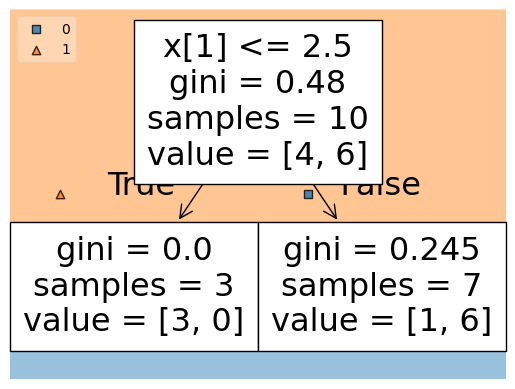

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create the initial DataFrame
df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

# Plot the initial data
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

# Initialize weights
df['weights'] = 1 / df.shape[0]

# Step 1 - Train the first model
dt1 = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
dt1.fit(x, y)

# Plot decision regions for the first model
plot_decision_regions(x, y, clf=dt1, legend=2)

# Step 2 - Make predictions
df['y_pred'] = dt1.predict(x)

# Step 3 - Calculate model weight
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / (error))

# Example error value for the first model
alpha1 = calculate_model_weight(0.3)
alpha1

# Step 4 - Update weights
def update_row_weights(row, alpha):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, axis=1, alpha=alpha1)

# Normalize updated weights
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

# Calculate cumulative sums for sampling
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

# Create new dataset based on updated weights
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a > row['cumsum_lower']:
                indices.append(index)
    return indices

index_values = create_new_dataset(df)
second_df = df.iloc[index_values, [0, 1, 2, 3, 4]]

# Step 5 - Train the second model
dt2 = DecisionTreeClassifier(max_depth=1)
x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values
dt2.fit(x, y)

# Plot the decision tree for the second model
plot_tree(dt2)

# Plot decision regions for the second model
plot_decision_regions(x, y, clf=dt2, legend=2)

# Step 6 - Make predictions and update weights for the second model
second_df['y_pred'] = dt2.predict(x)
alpha2 = calculate_model_weight(0.1)

# Update weights for the second DataFrame
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1, alpha=alpha2)

# Normalize updated weights for the second DataFrame
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

# Calculate cumulative sums for the second DataFrame
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

# Step 7 - Calculate third model weight
alpha3 = calculate_model_weight(0.7)
alpha3

# Print model weights
print(alpha1, alpha2, alpha3)

# Predictions on a new query point
query = np.array([1, 5]).reshape(1, 2)
pred1 = dt1.predict(query)
pred2 = dt2.predict(query)

# Calculate combined prediction using model weights
combined_prediction = alpha1 * pred1 + alpha2 * pred2
print(np.sign(combined_prediction))

# Predictions on another query point
query = np.array([9, 9]).reshape(1, 2)
pred1 = dt1.predict(query)
pred2 = dt2.predict(query)

# Calculate combined prediction for the second query
combined_prediction = alpha1 * pred1 + alpha2 * pred2
print(np.sign(combined_prediction))
